# Default of Credit Card Clients

## Uvod i opis problema
Opstepoznato je da banke izdaju kredite klijentima - to su neka finansijska sredstva koje banka "pozajmi" klijentu, uz uzajamno poverenje da ce klijent banci, kroz odredjeni vremenski period, vratiti pozajmljeno uz kamatu. Sa svakim ovim kreditom postoji rizik koji je sa njim asociran - jer se moze desiti da klijent ne obavlja svoje obaveze na vreme, zbog cega banka ima ogromne gubitke. Samim tim, banke su pokusavale da otkriju nacin i predvide koji klijent ce biti u stanju da redovno vraca svoja dugovanja analizirajuci razne podatke - starosnu dob klijenata, bracni status, nivo obrazovanja, stabilnost posla, finansijski istorijat istog klijenta itd. Zbog toga su banke razvile tzv "*credit risk scoring*" sistem, odnosno sistem koji svakog pojedinacnog klijenta "oceni" nekim brojem bodova, koji banci govori koliki je rizik vezan za klijenta - da li ce vracati svoju ratu na vreme ili ne. 


---


U ovom projektu analizirace se skup podataka "*Default of Credit Card Clients*" koji sadrzi podatke o klijentima koji (ne) kasne sa isplatom svoje rate za kredit. Skup sadrzi 24+1 razlicitih podataka koje cemo koristiti da predvidimo da li ce klijent zakasniti sa isplatom rate za kredit iduceg meseca ili ne, dok ona jedna kolona predstavlja konkretnu realizaciju nase ciljne(*target*) varijable - ona konkretno opisuje da li je korisnik zaista zakasnio sa isplatom ili ne, to je stvarna vrednost koju cemo porediti sa vrednostima koje generise nas sistem. 

Varijable koje su sadrzane u skupu podataka su sledece:

1.   ID: identifikacioni broj svakog klijenta
2. LIMIT_BAL: Kolicina sredstava izdata kao kredit(u tajvanskim dolarima) (includes individual and family/supplementary credit
3. SEX: Pol (1=musko, 2=zensko)
4. EDUCATION: Obrazovni nivo (1=poslediplomske studije, 2=univerzitet, 3=srednja skola, 4=ostalo, 5=nepoznato, 6=nepoznato)
5. MARRIAGE: Bracni status (1=u braku, 2=, 3=ostalo)
6. AGE: Starosna dob
7. PAY_0: Status otplate u septembru, 2005 (-1=placeno u roku, 1=isplata kasni jedan mesec, 2=isplata kasni dva meseca, … 8=isplata kasni osam meseci, 9=isplata kasni devet ili vise meseci)
8. PAY_2: Status otplate u avgustu, 2005 (opseg vrednosti isto kao i kod 7.)
9. PAY_3: Status otplate u julu, 2005 (opseg vrednosti isto kao i kod 7.)
10. PAY_4: Status otplate u junu, 2005 (opseg vrednosti isto kao i kod 7.)
11. PAY_5: Status otplate u maju, 2005 (opseg vrednosti isto kao i kod 7.)
12. PAY_6: Status otplate u aprilu, 2005 (opseg vrednosti isto kao i kod 7.)
13. BILL_AMT1: Kolicina izvoda racuna u septembru, 2005 (tajvanski dolar)
14. BILL_AMT2: Kolicina izvoda racuna u avgustu, 2005 (tajvanski dolar)
15. BILL_AMT3: Kolicina izvoda racuna u julu, 2005 (tajvanski dolar)
16. BILL_AMT4: Kolicina izvoda racuna u junu, 2005 (tajvanski dolar)
17. BILL_AMT5: Kolicina izvoda racuna u maju, 2005 (tajvanski dolar)
18. BILL_AMT6: Kolicina izvoda racuna u aprilu, 2005 (tajvanski dolar)
19. PAY_AMT1: Kolicina prethodne isplate u septembru, 2005 (tajvanski dolar)
20. PAY_AMT2: Kolicina prethodne isplate u avgustu, 2005 (tajvanski dolar)
21. PAY_AMT3: Kolicina prethodne isplate u julu, 2005 (tajvanski dolar)
22. PAY_AMT4: Kolicina prethodne isplate u junu, 2005 (tajvanski dolar)
23. PAY_AMT5: Kolicina prethodne isplate u maju, 2005 (tajvanski dolar)
24. PAY_AMT6: Kolicina prethodne isplate u aprilu, 2005 (tajvanski dolar)
25. **Target kolona** - default.payment.next.month: Da li je korisnik zakasnio (1=da, 0=ne)




Dataset preuzet sa [sledeceg sajta](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [162]:
try:
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/My\ Drive
    !ls UCI*
    IN_COLLAB=True
except:
    IN_COLLAB = False

## Preprocesiranje podataka

### Učitavanje podataka


In [163]:
import pandas as pd

data = pd.read_csv("UCI_Credit_Card.csv")
data.head(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   
7   8   100000.0    2          2         2   23      0     -1     -1      0   
8   9   140000.0    2          3         1   28      0      0      2      0   
9  10    20000.0    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
5  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
6  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
7  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
8  ...    12211.0    11793.0     3719.0    3329.0       0.0     432.0   
9  ...        0.0    13007.0    13912.0       0.0       0.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  
5    1000.0    1000.0     800.0                           0  
6   20239.0   13750.0   13770.0                           0  
7     581.0    1687.0    1542.0                           0  
8    1000.0    1000.0    1000.0                           0  
9   13007.0    1122.0       0.0                           0  

[10 rows x 25 columns]

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [165]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Iz linije iznad mozemo uvideti da nemamo kategorickih podataka, svi podaci su ili celobrojnog tipa ili *floating point* tipa, sto je pozeljno, ne moramo da se bavimo enkodovanjem kako bi od kategorickih dobili numericke podatke.

### Ciscenje, obrada podataka...

In [166]:
data.isnull().sum(axis=0) # provera da li ima nekih null/NaN vrednosti

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [204]:
data.isna().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [167]:
for column in data:
  print("Vrednosti kolone " ,column,"\n", data[column].unique()) # stampamo unique vrednosti u svakoj koloni

Vrednosti kolone  ID 
 [    1     2     3 ... 29998 29999 30000]
Vrednosti kolone  LIMIT_BAL 
 [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
Vrednosti kolone  SEX 
 [2 1]
Vrednosti kolone  EDUCATION 
 [2 1 3 5 4 6 0]
Vrednosti kolone  MARRIAGE 
 [1 2 3 0]
Vrednosti kolone  AGE 
 [24 26 34 37 57 29 23 28 

Potrebno je izvrsiti dodatnu ispravku nad podacima:
1. U nekim kolonama(EDUCATION i MARRIAGE) javljaju se vrednosti koje ne postoje opisane u datasetu
2. Vrednosti u kolonama PAY_x treba da budu pomerene za jedan, jer se tek tako onda poklapaju sa originalnim opisom podataka
3. Kada izvrsimo 2. onda moramo dropovati redove gde je PAY_x = 0, jer ta vrednost ne postoji u opisu

In [168]:
data = data.drop(data[(data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)| (data.MARRIAGE == 0)].index)#uklanjamo tamo gde je edukacija oznacena kao nepoznata

for index,row in data.iterrows():#potrebno je inkrementirati ove kolone u svakom redu za 1 da bi se opseg podudarao sa opisom
  data.at[index,"PAY_0"]=row["PAY_0"]+1
  data.at[index,"PAY_2"]=row["PAY_2"]+1
  data.at[index,"PAY_3"]=row["PAY_3"]+1
  data.at[index,"PAY_4"]=row["PAY_4"]+1
  data.at[index,"PAY_5"]=row["PAY_5"]+1
  data.at[index,"PAY_6"]=row["PAY_6"]+1

data = data.drop(data[
                      (data.PAY_0 == 0) | 
                      (data.PAY_2 == 0) |
                      (data.PAY_3 == 0) |
                      (data.PAY_4 == 0) |
                      (data.PAY_5 == 0) |
                      (data.PAY_6 == 0) 
                      ].index)#uklanjamo tamo gde je PAY_X oznacen kao nula, jer takvih vrednosti nemamo u opisu

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

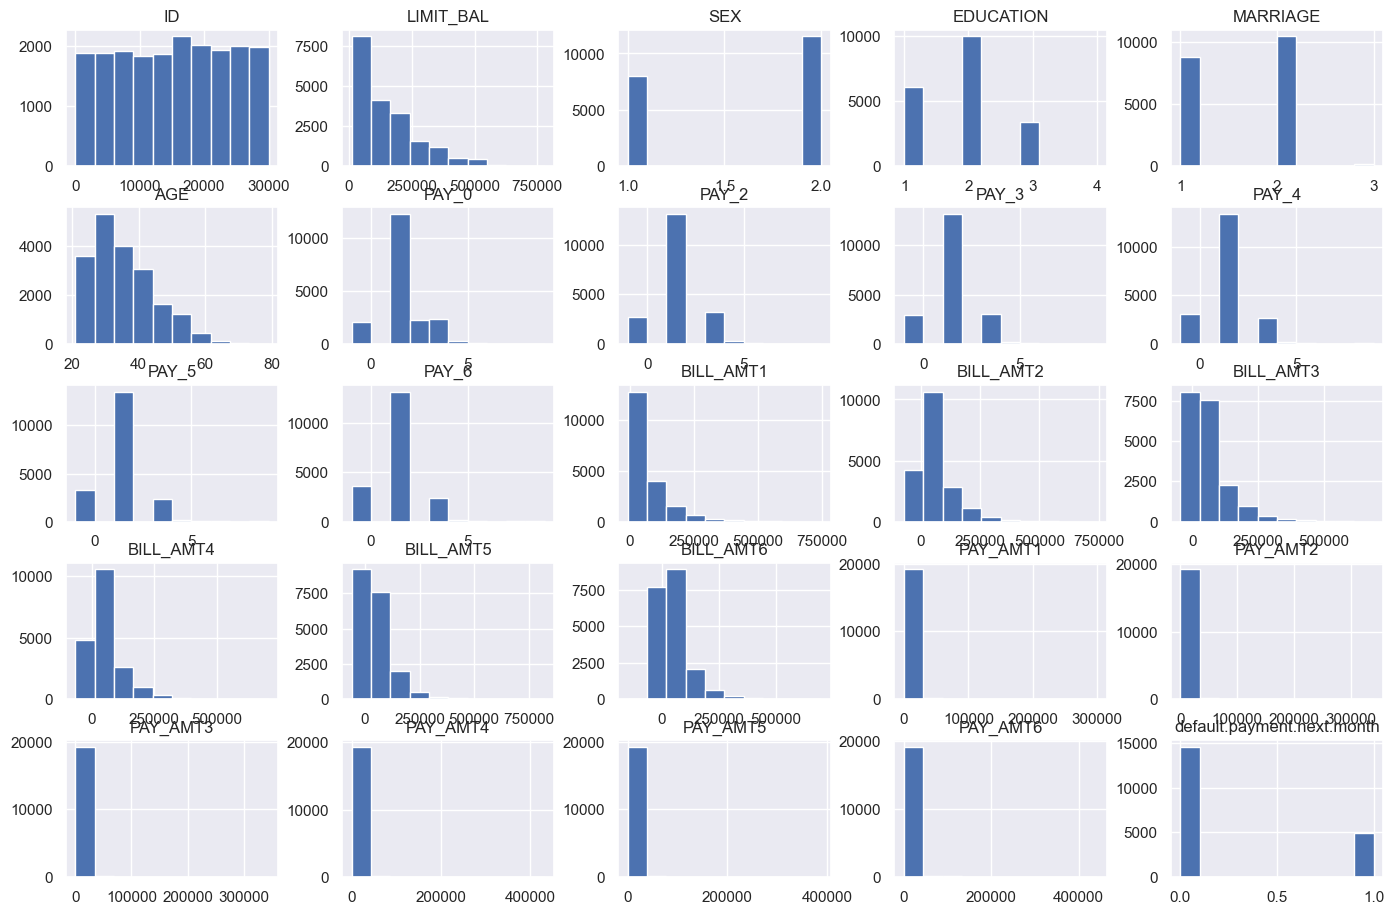

In [203]:
data.hist(figsize=(17,11))

In [170]:
inputs = data.drop(labels="default.payment.next.month", axis=1)# ekstrahujemo ulazni vektor, bez target kolone
outputs = data["default.payment.next.month"] # ekstrahujemo target kolonu kao output

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42) # splitovanje na train i test skup

In [171]:
len(inputs.columns)

24

### Eksploratorna analiza

In [172]:
data.describe()

ID      LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  19496.000000   19496.000000  19496.000000  19496.000000  19496.000000   
mean   15211.046163  152157.554370      1.590942      1.871153      1.559551   
std     8624.711550  125822.937977      0.491673      0.695581      0.518588   
min        3.000000   10000.000000      1.000000      1.000000      1.000000   
25%     7744.750000   50000.000000      1.000000      1.000000      1.000000   
50%    15521.500000  110000.000000      2.000000      2.000000      2.000000   
75%    22595.500000  220000.000000      2.000000      2.000000      2.000000   
max    30000.000000  780000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  19496.000000  19496.000000  19496.000000  19496.000000  19496.000000   
mean      35.378847      1.227226      1.130129      1.085146      1.024467   
std        9.409070      1.142959      1.227681      1.232597      1.235645   
min       21.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       28.000000      1.000000      1.000000      1.000000      1.000000   
50%       34.000000      1.000000      1.000000      1.000000      1.000000   
75%       41.000000      2.000000      1.000000      1.000000      1.000000   
max       79.000000      9.000000      9.000000      9.000000      9.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   19496.000000   19496.000000   19496.000000   19496.000000   
mean   ...   57294.118947   53168.606124   51082.047087    4664.737331   
std    ...   70075.650392   66251.868867   64854.506120   10833.285854   
min    ...  -65167.000000  -61372.000000 -150953.000000       0.000000   
25%    ...   12432.750000   10399.000000    9075.000000    1314.000000   
50%    ...   30575.000000   28854.500000   27941.000000    2400.000000   
75%    ...   77082.000000   71836.000000   69505.000000    5000.000000   
max    ...  706864.000000  823540.000000  699944.000000  300000.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count   19496.000000   19496.000000   19496.000000   19496.000000   
mean     4456.005693    3878.363613    3629.849456    3714.235279   
std     11030.703036    9908.420352    9650.800302   10683.944366   
min         0.000000       0.000000       0.000000       0.000000   
25%      1218.750000     712.750000     500.000000     400.000000   
50%      2160.000000    2000.000000    1689.500000    1700.000000   
75%      5000.000000    4118.500000    4000.000000    4000.000000   
max    340000.000000  344261.000000  432130.000000  388071.000000   

            PAY_AMT6  default.payment.next.month  
count   19496.000000                19496.000000  
mean     4471.632796                    0.250051  
std     15096.411407                    0.433053  
min         0.000000                    0.000000  
25%       350.000000                    0.000000  
50%      1685.000000                    0.000000  
75%      4000.000000                    1.000000  
max    443001.000000                    1.000000  

[8 rows x 25 columns]

In [173]:
%matplotlib inline
import seaborn as sbn; sbn.set()
data_temp = data.drop(labels=["PAY_2","PAY_3","PAY_4","PAY_5","PAY_6", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6", "PAY_AMT2","PAY_AMT3","PAY_AMT4", "PAY_AMT5","PAY_AMT6"],axis=1)
sbn.pairplot(data_temp.sample(1000), hue='default.payment.next.month', height=10)

In [174]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient()

### Normalizacija podataka - skaliranje

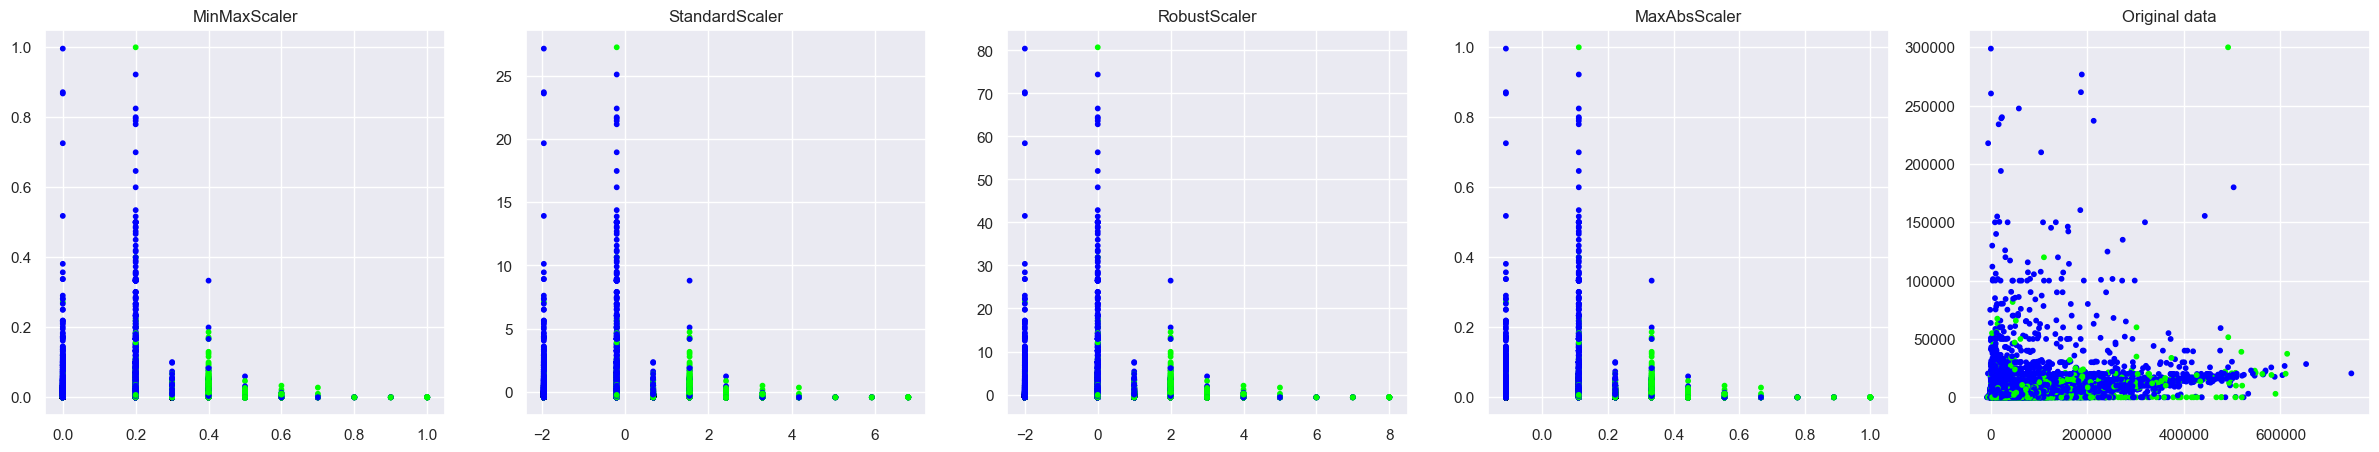

In [175]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np

def crtanje(skaleri, kolone=('BILL_AMT1','PAY_AMT1') ):
  figure, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
  osa = 0
  for skaler in skaleri:
    skaliran_input = skaler.fit_transform(inputs)
    axes[osa].scatter(skaliran_input[:,6], skaliran_input[:,18], c=outputs, s=10, cmap="brg")
    axes[osa].set_title(skaler.__class__.__name__)
    osa+=1
  axes[osa].scatter(inputs[kolone[0]], inputs[kolone[1]], c=outputs, s=10, cmap="brg")
  axes[osa].set_title("Original data")

skaleri = [MinMaxScaler(), StandardScaler(), RobustScaler(), MaxAbsScaler()]

crtanje(skaleri)

Odabracemo Robustni skaler da bismo smanjili uticaj tzv. "*outlier*" slucajeva(slucajeva koji su ili previse mali, ili previse veliki u odnosu na ostatak dataseta, a mogu da uticu na rezultate u velikoj meri)

In [176]:
robustni_skaler = RobustScaler() 

X_train = robustni_skaler.fit_transform(X_train)
X_test = robustni_skaler.transform(X_test) # ne fitujemo podatke na testnom skupu, samo ih transformisemo!

### Izbor i ucenje modela

Modele koje cemo koristiti za predikciju su:
1. K Nearest Neighbor model
2. Naive Bayes klasifikator
3. Klasifikator stohastickog gradijentnog spusta
4. Logisticku regresiju

U ovom delu samo zelimo da vidimo kakve rezultate daju nasi modeli bez "stelovanja" hiperparametara

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression

modeli = [
          KNeighborsClassifier(),
          SGDClassifier(),
          LogisticRegression(),
          BernoulliNB()
]

Y_prediction = {
    "KNeighborsClassifier":0,
    "SGDClassifier":0,
    "BernoulliNB":0,
    "LogisticRegression":0

}

for model in modeli:
  Y_prediction[model.__class__.__name__] = model.fit(X_train,Y_train).predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import pprint

#dictionary sa svim nasim metrikama
metrike = {
    "accuracy_score" : {
        "KNeighborsClassifier":0,
        "SGDClassifier":0,
         "BernoulliNB":0,
        "LogisticRegression":0
    },
    "precision_score" : {
        "KNeighborsClassifier":0,
        "SGDClassifier":0,
        "BernoulliNB":0,
        "LogisticRegression":0
    },
    "recall_score" : {
        "KNeighborsClassifier":0,
        "SGDClassifier":0,
         "BernoulliNB":0,
        "LogisticRegression":0
    }
}

#metrika = "accuracy_score", "precision_score" itd.
#rezultati = Y_prediction
for metrika,rezultati in zip(metrike.keys(), metrike.values()):
  for key,value in zip(Y_prediction.keys(), Y_prediction.values()):
    rezultati[key] = globals()[metrika](Y_test, value) #globals()[metrika](...) izvrsava funkciju metrike tako sto interpretira string kao callable

pprint.pprint(metrike)

{'accuracy_score': {'BernoulliNB': 0.7751282051282051,
                    'KNeighborsClassifier': 0.7912820512820513,
                    'LogisticRegression': 0.8133333333333334,
                    'SGDClassifier': 0.8056410256410257},
 'precision_score': {'BernoulliNB': 0.5422740524781341,
                     'KNeighborsClassifier': 0.6008064516129032,
                     'LogisticRegression': 0.7234848484848485,
                     'SGDClassifier': 0.6555891238670695},
 'recall_score': {'BernoulliNB': 0.578838174273859,
                  'KNeighborsClassifier': 0.4636929460580913,
                  'LogisticRegression': 0.3962655601659751,
                  'SGDClassifier': 0.45020746887966806}}


### Optimizacija hiperparametara

U ovom delu se koristi validacioni skup, pomocu kojeg tjunujemo hiperparametre

In [178]:
for nesto in zip(inputs.columns, [x for x in range(24)]):
    print(nesto)

('ID', 0)
('LIMIT_BAL', 1)
('SEX', 2)
('EDUCATION', 3)
('MARRIAGE', 4)
('AGE', 5)
('PAY_0', 6)
('PAY_2', 7)
('PAY_3', 8)
('PAY_4', 9)
('PAY_5', 10)
('PAY_6', 11)
('BILL_AMT1', 12)
('BILL_AMT2', 13)
('BILL_AMT3', 14)
('BILL_AMT4', 15)
('BILL_AMT5', 16)
('BILL_AMT6', 17)
('PAY_AMT1', 18)
('PAY_AMT2', 19)
('PAY_AMT3', 20)
('PAY_AMT4', 21)
('PAY_AMT5', 22)
('PAY_AMT6', 23)


In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

def optimizacija(model,hiperparametri,metrike, training_input, training_output, test_input, test_output):
  print("Analirizam ",model.__class__.__name__," model")
  print("-------------------------------------------------------------------------------------")
  rezultat = {
      "model" : model.__class__.__name__,
      "metrika": metrike,
      "prediction": [],
      "prediction_probability": []
  }
  grid = GridSearchCV(model, hiperparametri, cv=5, scoring=metrike)                                      # kreiranje grid-a
  grid.fit(training_input, training_output)                                                              # fitovanje podataka
  rezultat["prediction"] = grid.predict(test_input)                                                      # radimo prediktovanje
  rezultat["prediction_probability"] = grid.predict_proba(test_input)                                    # radimo prediktovanje
  print('Najbolje vrednosti parametra: ', grid.best_params_)
  print("Scorer used was: ", metrika, " and the test score was: ", grid.cv_results_['mean_test_score'])
  try:
    if not test_input.shape[1] < len(inputs.columns):
      best_estimator = grid.best_estimator_
      results = permutation_importance(best_estimator, test_input, test_output, scoring=metrike)
      importance = results.importances_mean
      importance=np.sort(importance)
      pyplot.figure(figsize=(15,10))
      pyplot.bar([feature for idx,feature in enumerate(inputs.columns)],importance)
      pyplot.xticks(rotation=45)
      pyplot.show()
  except Exception as e:
    print("Doslo je do greske\t",e)
  print("-------------------------------------------------------------------------------------\n")
  ConfusionMatrixDisplay.from_predictions(Y_test, rezultat["prediction"])                                # Prikaz konfuzione matrice

  return rezultat

def evaluacija(rezultat):
  eval_res = {
      "model": rezultat["model"],
      "accuracy_score": 0,
      "precision_score":0,
      "recall_score":0,
      "roc_auc_score":0
  }
  eval_res["accuracy_score"] = accuracy_score(Y_test, rezultat["prediction"])
  eval_res["precision_score"] = precision_score(Y_test, rezultat["prediction"])
  eval_res["recall_score"] = recall_score(Y_test, rezultat["prediction"])
  eval_res["roc_auc_score"] = roc_auc_score(Y_test, rezultat["prediction_probability"][:,1])
  return eval_res

def pronadji_optimalne_metrike(ukupno):
  accuracy = {
      "model":ukupno[0]["model"],
      "metrika":"accuracy",
      "score" : ukupno[0]["accuracy_score"]
  }
  precision = {
      "model":ukupno[0]["model"],
      "metrika":"precision",
      "score" : ukupno[0]["precision_score"]
  }
  recall = {
      "model":ukupno[0]["model"],
      "metrika":"recall",
      "score" : ukupno[0]["recall_score"]
  }
  roc_auc = {
      "model":ukupno[0]["model"],
      "metrika":"roc_auc",
      "score" : ukupno[0]["roc_auc_score"]
  }
  
  for model in ukupno:
    if model["accuracy_score"] > accuracy["score"]:
      accuracy["model"] = model["model"]
      accuracy["score"]  =model["accuracy_score"]
     
    if model["precision_score"] > precision["score"]:
      precision["model"] = model["model"]
      precision["score"]  =model["precision_score"]
     
    if model["recall_score"] > recall["score"]:
      recall["model"] = model["model"]
      recall["score"]  =model["recall_score"]
     
    if model["roc_auc_score"] > roc_auc["score"]:
      roc_auc["model"] = model["model"]
      roc_auc["score"]  =model["roc_auc_score"]
    
  return [accuracy, precision, recall, roc_auc]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# create some synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# create a logistic regression model
model = LogisticRegression()

# define the grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['none', 'l2']
}

# create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# print the results for each combination of hyperparameters
for params, mean_score, std_score in zip(
    grid_search.cv_results_['params'],
    grid_search.cv_results_['mean_test_score'],
    grid_search.cv_results_['std_test_score']
):
    print(params, "mean score:", mean_score, "std score:", std_score)

In [208]:
grid_search.cv_results_

{'mean_fit_time': array([0.00319719, 0.00247746, 0.00260077, 0.0027986 , 0.00249896,
        0.0024003 ]),
 'std_fit_time': array([0.00040019, 0.00044974, 0.00049006, 0.00074866, 0.00044697,
        0.00049074]),
 'mean_score_time': array([0.0006012 , 0.00059915, 0.00059972, 0.00040083, 0.00049996,
        0.00039978]),
 'std_score_time': array([0.00049087, 0.0004892 , 0.00048967, 0.00049091, 0.00044681,
        0.00048963]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['none', 'l2', 'none', 'l2', 'none', 'l2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'penalty': 'none'},
  {'C': 0.1, 'penalty': 'l2'},
  {'C': 1, 'penalty': 'none'},
  {'C': 1, 'penalty': 'l2'},
  {'C': 10, 'penalty': 'none'},
  {'C': 10, 'penalty': 'l2'}],
 'split

In [180]:
suma_sumarum = []

In [181]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
print(importance)
for feature,score in zip(inputs.columns, [x for x in range(len(inputs.columns))]):
    print('Feature: {}  Score: {}' .format(feature,score))
    # print(feature,score)

[0.     0.0052 0.0064 0.0442 0.0606 0.0636 0.0806 0.0872 0.0874 0.1052]
Feature: ID  Score: 0
Feature: LIMIT_BAL  Score: 1
Feature: SEX  Score: 2
Feature: EDUCATION  Score: 3
Feature: MARRIAGE  Score: 4
Feature: AGE  Score: 5
Feature: PAY_0  Score: 6
Feature: PAY_2  Score: 7
Feature: PAY_3  Score: 8
Feature: PAY_4  Score: 9
Feature: PAY_5  Score: 10
Feature: PAY_6  Score: 11
Feature: BILL_AMT1  Score: 12
Feature: BILL_AMT2  Score: 13
Feature: BILL_AMT3  Score: 14
Feature: BILL_AMT4  Score: 15
Feature: BILL_AMT5  Score: 16
Feature: BILL_AMT6  Score: 17
Feature: PAY_AMT1  Score: 18
Feature: PAY_AMT2  Score: 19
Feature: PAY_AMT3  Score: 20
Feature: PAY_AMT4  Score: 21
Feature: PAY_AMT5  Score: 22
Feature: PAY_AMT6  Score: 23


#### K-Nearest Neighbors


Analirizam  KNeighborsClassifier  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}
Scorer used was:  recall_score  and the test score was:  [0.72877745 0.72877745 0.78257257 0.76840257 0.78238022 0.78218781
 0.79116462 0.79084402 0.72877745 0.72877745 0.78257257 0.76840257
 0.78238022 0.78218781 0.79116462 0.79084402 0.72877745 0.72877745
 0.78257257 0.76840257 0.78238022 0.78218781 0.79116462 0.79084402]


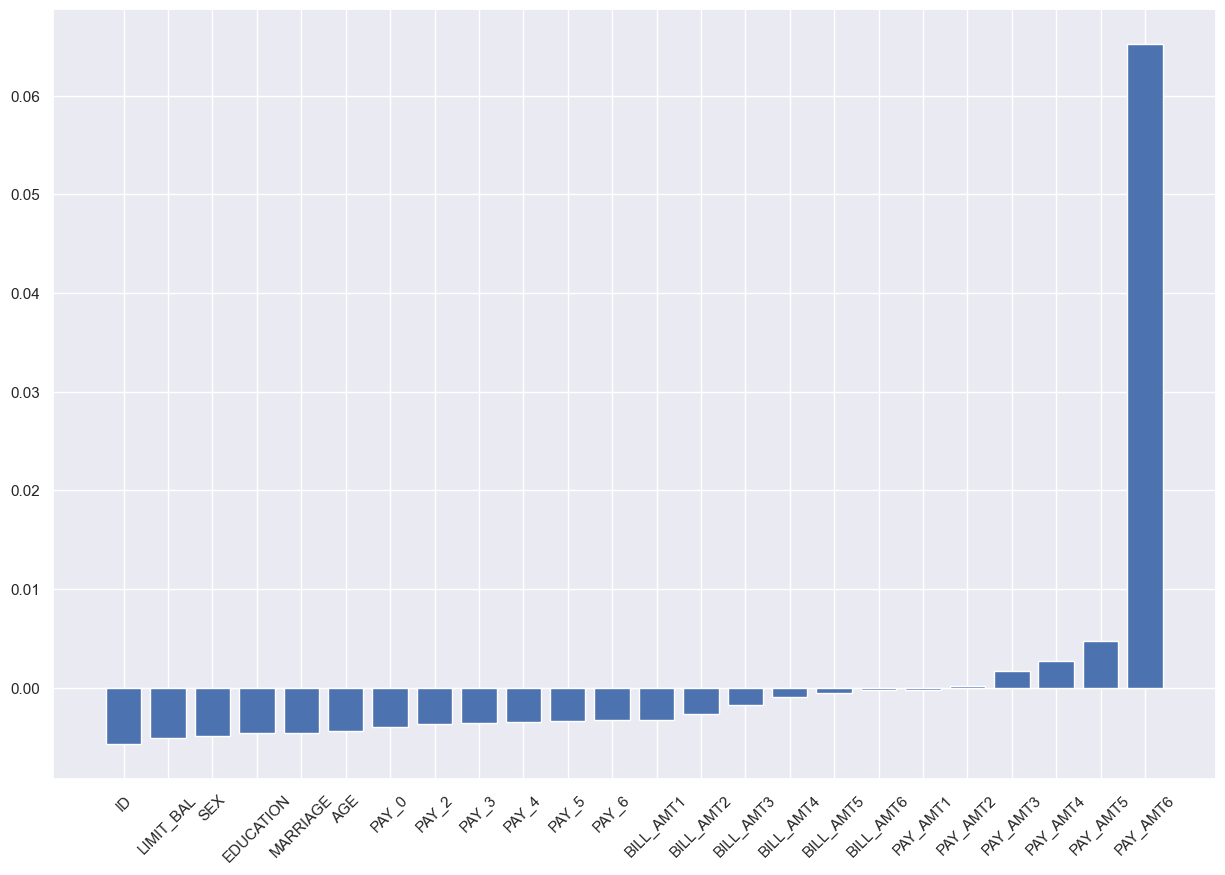

-------------------------------------------------------------------------------------

{'accuracy_score': 0.7948717948717948,
 'model': 'KNeighborsClassifier',
 'precision_score': 0.6151685393258427,
 'recall_score': 0.45435684647302904,
 'roc_auc_score': 0.7723179206191277}


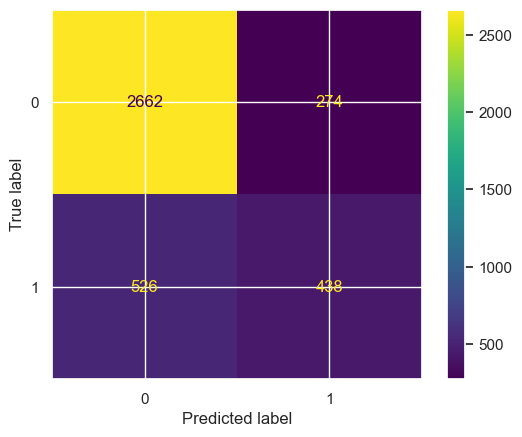

In [182]:
# Parametri KNN-a:
# n_neighborsint, default=5
# weights{"uniform", "distance"} or callable, default="uniform"
# algorithm{"auto", "ball_tree", "kd_tree", "brute"}, default="auto"
# leaf_sizeint, default=30
# pint, default=2
# metricstr or callable, default="minkowski"

rezultat_knn = optimizacija(
    model=KNeighborsClassifier(), 
    hiperparametri={ "n_neighbors" : [1,4,5,9] , "weights" : ["uniform", "distance"], "leaf_size" : [15,20,35]},
    metrike="accuracy",
    training_input=X_train,
    training_output=Y_train,
    test_input=X_test,
    test_output=Y_test
)
rezultat_evaluacije = evaluacija(rezultat_knn)

pprint.pprint(rezultat_evaluacije)

suma_sumarum.append(rezultat_evaluacije)

#### Stochastic Gradient Descent

Analirizam  SGDClassifier  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'alpha': 0.01, 'eta0': 0.1, 'fit_intercept': True, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l1'}
Scorer used was:  recall_score  and the test score was:  [0.75852646 0.77904415 0.80802768 0.80931016 0.80777135 0.80924602
 0.80745067 0.80982313 0.69729419 0.72614774 0.76333726 0.76179863
 0.76500432 0.76134971 0.76551736 0.76288848 0.76493818 0.76128571
 0.80802768 0.80931016 0.80712992 0.80745057 0.8075148  0.8096949
 0.66613214 0.73294115 0.76333726 0.76179863 0.76269613 0.76102926
 0.76570973 0.76256784 0.68114838 0.77590301 0.80802768 0.80931016
 0.80674528 0.80815599 0.80738655 0.8096949  0.68767989 0.66709559
 0.76333726 0.76179863 0.76385037 0.75852854 0.76545324 0.76192665
 0.69665329 0.7750699  0.80802768 0.80931016 0.80238519 0.80751467
 0.80732241 0.80963076 0.63574142 0.65145144 0.76333726 0.76179863
 0.760

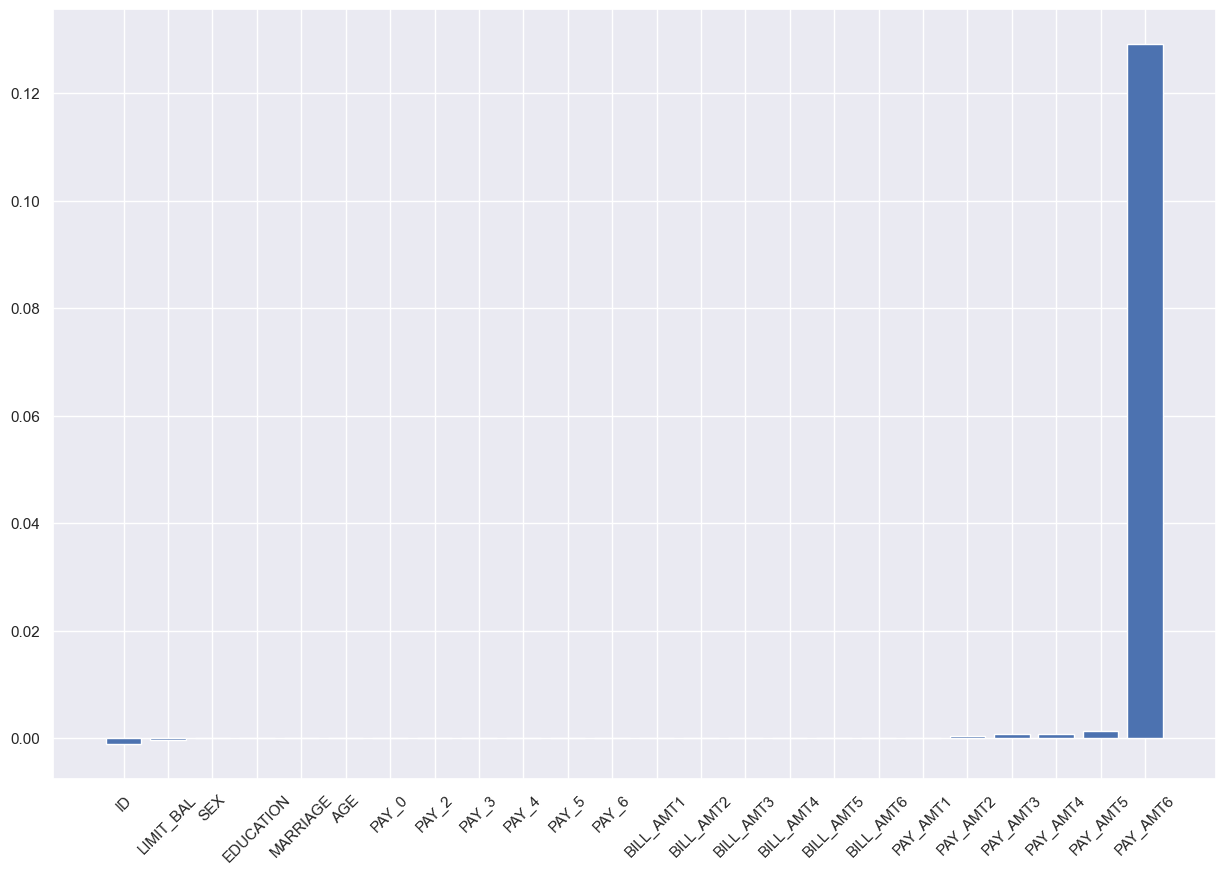

-------------------------------------------------------------------------------------

{'accuracy_score': 0.8156410256410257,
 'model': 'SGDClassifier',
 'precision_score': 0.7239488117001828,
 'recall_score': 0.4107883817427386,
 'roc_auc_score': 0.7786119441586487}


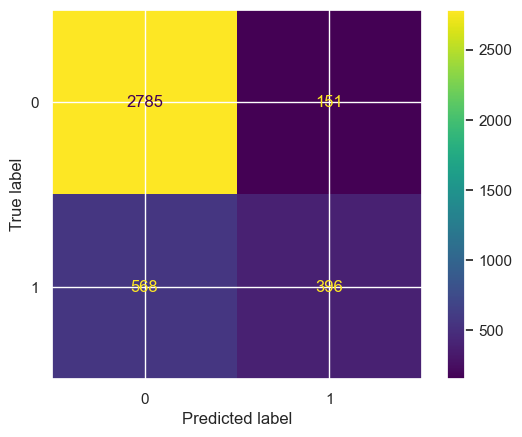

In [183]:
# Parametri stohastickog gradijentnog spusta:
# lossstr, default="hinge" - The possible options are "hinge", "log", "modified_huber", "squared_hinge", "perceptron", or a regression loss: "squared_error", "huber", "epsilon_insensitive", or "squared_epsilon_insensitive"(and maybe squared_loss).
# penalty{"l2", "l1", "elasticnet"}, default="l2"
# alphafloat, default=0.0001
# l1_ratiofloat, default=0.15 - The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is "elasticnet".
# fit_interceptbool, default=True - Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.
# max_iterint, default=1000 - The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.
# tolfloat, default=1e-3 - The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.
# shufflebool, default=True - Whether or not the training data should be shuffled after each epoch.
# epsilonfloat, default=0.1 - Epsilon in the epsilon-insensitive loss functions; only if loss is "huber", "epsilon_insensitive", or "squared_epsilon_insensitive". For "huber", determines the threshold at which it becomes less important to get the prediction exactly right.
# random_stateint, RandomState instance, default=None - Used for shuffling the data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls
# learning_ratestr, default="optimal" - "constant": eta = eta0; "optimal": eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou. ; "invscaling": eta = eta0 / pow(t, power_t); "adaptive": eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
# eta0float, default=0.0 - The initial learning rate for the "constant", "invscaling" or "adaptive" schedules. The default value is 0.0 as eta0 is not used by the default schedule "optimal".
# power_tfloat, default=0.5 - The exponent for inverse scaling learning rate [default 0.5].
# early_stoppingbool, default=False - Whether to use early stopping to terminate training when validation score is not improving. 
# validation_fractionfloat, default=0.1 - The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.
# n_iter_no_changeint, default=5 - Number of iterations with no improvement to wait before stopping fitting. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.
# class_weightdict, {class_label: weight} or “balanced”, default=None - Preset for the class_weight fit parameter. Weights associated with classes. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
# warm_startbool, default=False - Repeatedly calling fit or partial_fit when warm_start is True can result in a different solution than when calling fit a single time because of the way the data is shuffled. If a dynamic learning rate is used, the learning rate is adapted depending on the number of samples already seen. Calling fit resets this counter, while partial_fit will result in increasing the existing counter.
# averagebool or int, default=False - When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute. If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples.

rezultat_SGDC = optimizacija(
    model=SGDClassifier(max_iter=1000, random_state=42), 
    hiperparametri={ 
          "alpha": [0.01, 0.5, 1, 3, 5], 
          "penalty": ["l2", "l1"], "loss": ["log_loss"],
          "fit_intercept" : [True, False],
          "learning_rate" : ["constant", "optimal", "invscaling", "adaptive"],
          "eta0" : [ 0.1, 0.5, 1, 2]
    },
    metrike="accuracy",
    training_input=X_train,
    training_output=Y_train,
    test_input=X_test,
    test_output=Y_test
) 

rezultat_evaluacije = evaluacija(rezultat_SGDC)

pprint.pprint(rezultat_evaluacije)

suma_sumarum.append(rezultat_evaluacije)

#### Bernoulli Naive Bayes

Analirizam  BernoulliNB  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'alpha': 500, 'fit_prior': True}
Scorer used was:  recall_score  and the test score was:  [0.77513511 0.73416358 0.77526332 0.73416358 0.77622502 0.73442001
 0.77641741 0.73935688 0.77789206 0.75788739 0.78520139 0.77301917]


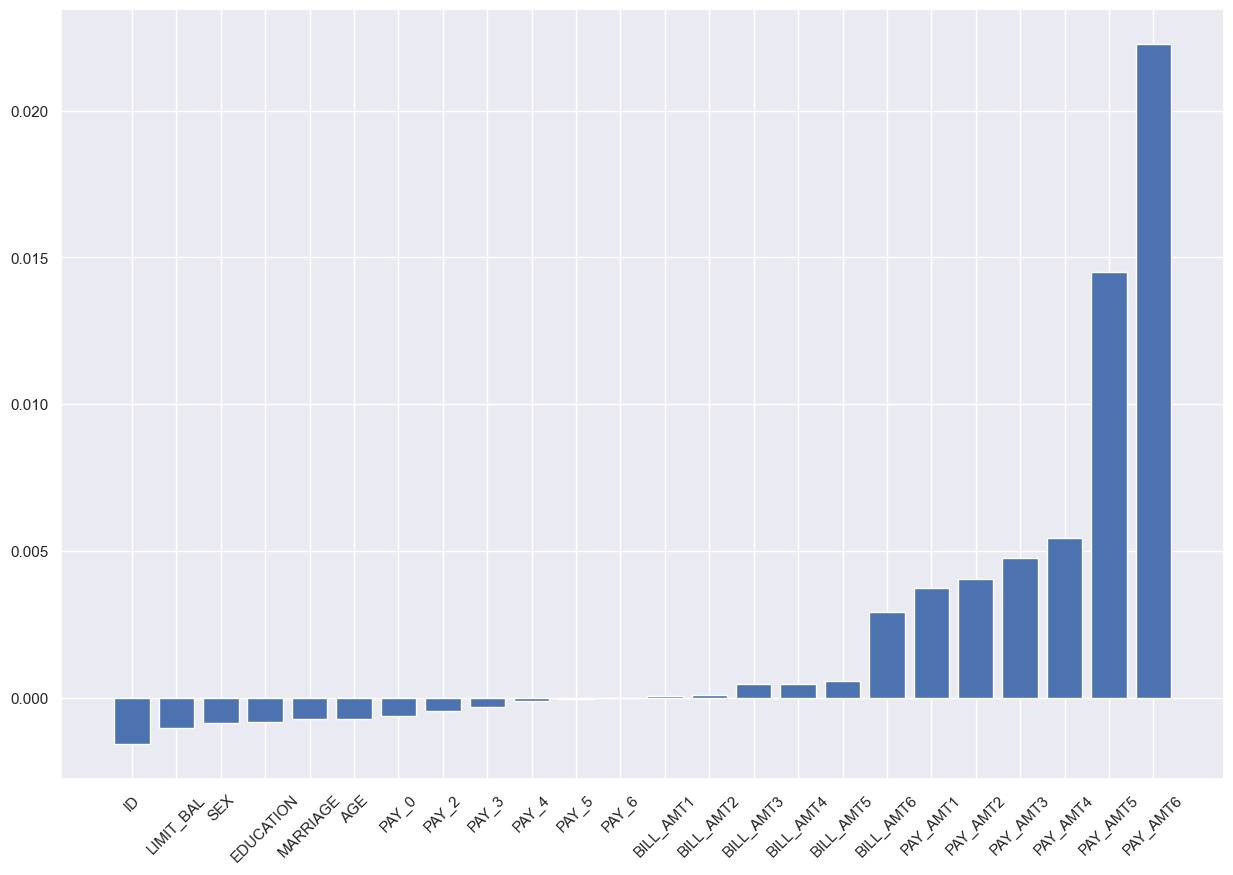

-------------------------------------------------------------------------------------

{'accuracy_score': 0.788974358974359,
 'model': 'BernoulliNB',
 'precision_score': 0.5834319526627219,
 'recall_score': 0.5114107883817427,
 'roc_auc_score': 0.7627608200391195}


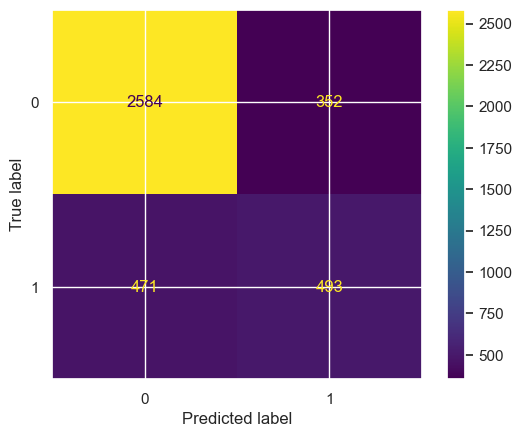

In [184]:
# Parametri naivnog Bajesa:
# alpha - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
# binarize - Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.
# fit_prior - Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
# class_prior - Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

rezultat_NaiveBayes = optimizacija(
    model=BernoulliNB(), 
    hiperparametri={ "alpha": [10, 15, 30, 50, 100, 500], "fit_prior": [True,False] },
    metrike="accuracy",
    training_input=X_train,
    training_output=Y_train,
    test_input=X_test,
    test_output=Y_test
) 

rezultat_evaluacije = evaluacija(rezultat_NaiveBayes)

pprint.pprint(rezultat_evaluacije)

suma_sumarum.append(rezultat_evaluacije)

#### Logistic Regression

Analirizam  LogisticRegression  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'C': 0.05, 'penalty': 'l1'}
Scorer used was:  recall_score  and the test score was:  [0.67107772 0.79077961 0.75897664 0.79834599 0.80873308 0.8084125
 0.80860483 0.80854071 0.80847656 0.80854069 0.80854069 0.80860481
 0.80860481 0.80860481]


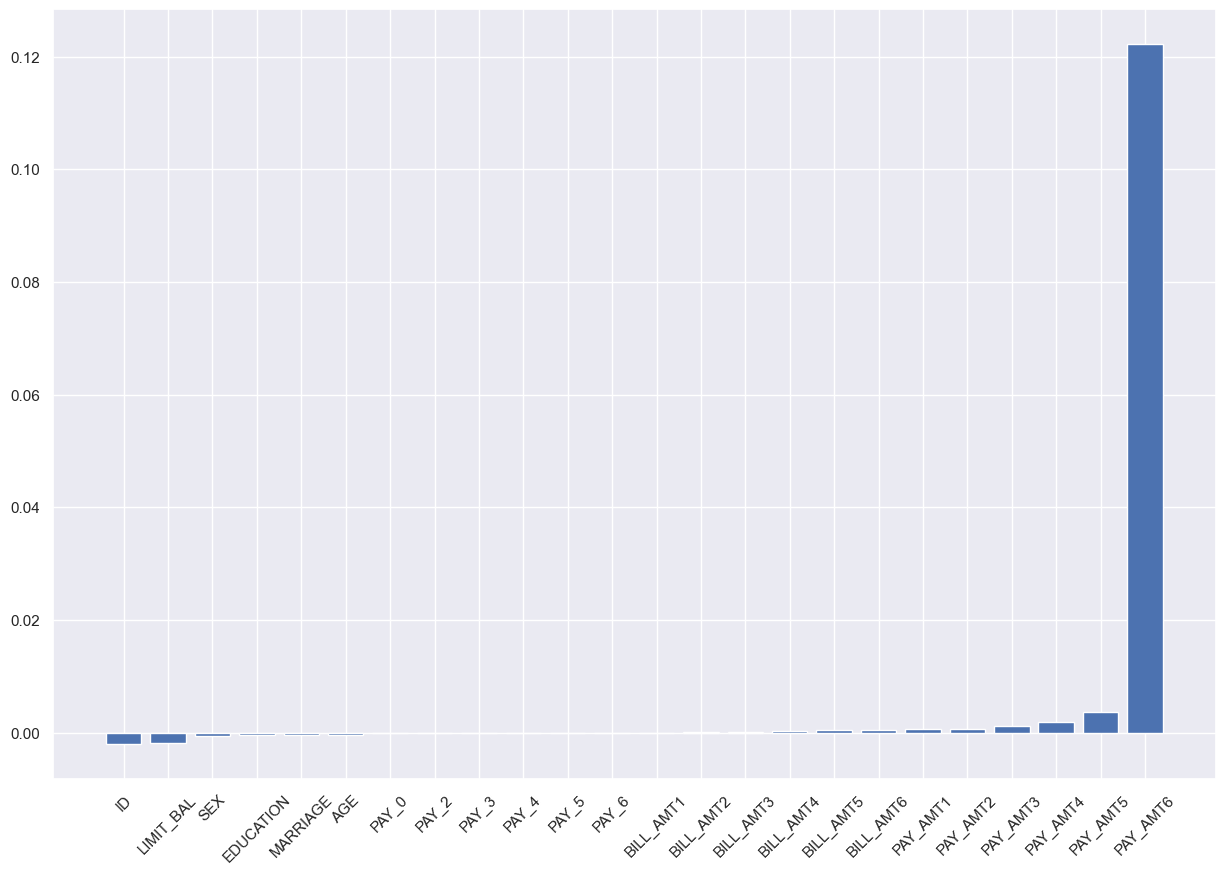

-------------------------------------------------------------------------------------

{'accuracy_score': 0.8135897435897436,
 'model': 'LogisticRegression',
 'precision_score': 0.7223264540337712,
 'recall_score': 0.3993775933609959,
 'roc_auc_score': 0.7823212630162696}


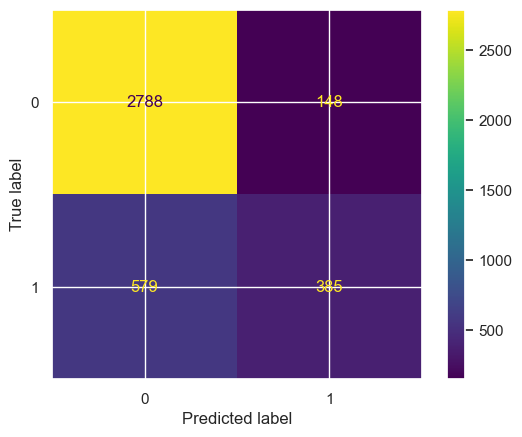

In [198]:
# Parametri logisticke regresije:
# penalty{"l1", "l2", "elasticnet", "none"}, default="l2"
# dualbool, default=False - Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
# tolfloat, default=1e-4 - Tolerance for stopping criteria.
# Cfloat, default=1.0 - 1/C hiperparametar
# fit_interceptbool, default=True - Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
# intercept_scalingfloat, default=1 - Useful only when the solver "liblinear" is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.
# class_weightdict or "balanced", default=None - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
# random_stateint, RandomState instance, default=None - Used when solver == "sag", "saga" or "liblinear" to shuffle the data. See Glossary for details.
# solver{"newton-cg", "lbfgs", "liblinear", "sag", "saga"}, default="lbfgs" - supported penalties: "newton-cg" - ["l2", "none"], lbfgs" - ["l2", "none"],"liblinear" - ["l1", "l2"], "sag" - ["l2", "none"], "saga" - ["elasticnet", "l1", "l2", "none"], 
# max_iterint, default=100 - Maximum number of iterations taken for the solvers to converge.
# l1_ratiofloat, default=None - The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

rezultat_logReg = optimizacija(
    model=LogisticRegression(solver="liblinear", max_iter=500), 
    hiperparametri={ "penalty": ["l1", "l2"], "C": [0.0003, 0.001, 0.05, 0.1, 1, 2, 5]},
    metrike="accuracy",
    training_input=X_train,
    training_output=Y_train,
    test_input=X_test,
    test_output=Y_test
) 
rezultat_evaluacije = evaluacija(rezultat_logReg)

pprint.pprint(rezultat_evaluacije)

suma_sumarum.append(rezultat_evaluacije)

**Tumacenje rezultata:**

In [186]:
for rezultat in pronadji_optimalne_metrike(suma_sumarum):
  print("Model sa najboljim ",rezultat["metrika"],"(",rezultat["score"],") je: ",rezultat["model"])

Model sa najboljim  accuracy ( 0.8156410256410257 ) je:  SGDClassifier
Model sa najboljim  precision ( 0.7239488117001828 ) je:  SGDClassifier
Model sa najboljim  recall ( 0.5114107883817427 ) je:  BernoulliNB
Model sa najboljim  roc_auc ( 0.7823159632322181 ) je:  LogisticRegression


In [187]:
pprint.pprint(suma_sumarum)

[{'accuracy_score': 0.7948717948717948,
  'model': 'KNeighborsClassifier',
  'precision_score': 0.6151685393258427,
  'recall_score': 0.45435684647302904,
  'roc_auc_score': 0.7723179206191277},
 {'accuracy_score': 0.8156410256410257,
  'model': 'SGDClassifier',
  'precision_score': 0.7239488117001828,
  'recall_score': 0.4107883817427386,
  'roc_auc_score': 0.7786119441586487},
 {'accuracy_score': 0.788974358974359,
  'model': 'BernoulliNB',
  'precision_score': 0.5834319526627219,
  'recall_score': 0.5114107883817427,
  'roc_auc_score': 0.7627608200391195},
 {'accuracy_score': 0.8135897435897436,
  'model': 'LogisticRegression',
  'precision_score': 0.7223264540337712,
  'recall_score': 0.3993775933609959,
  'roc_auc_score': 0.7823159632322181}]


### Selekcija atributa

In [188]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

best_attributes = SelectKBest(k=6, score_func=mutual_info_classif)
best_attributes.fit(X_train, Y_train)

# X_reduced_training_set = pd.DataFrame(best_attributes.transform(X_train), columns=X_train[0,best_attributes.get_support()])
# X_reduced_testing_set = pd.DataFrame(best_attributes.transform(X_test), columns=X_test[0,best_attributes.get_support()])
X_reduced_training_set = best_attributes.transform(X_train)
X_reduced_testing_set = best_attributes.transform(X_test)

#### Reevaluacija sa novim atributima

In [189]:
suma_sumarum_reduced = []

**K-Nearest Neighbours**

Analirizam  KNeighborsClassifier  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}
Scorer used was:  recall_score  and the test score was:  [0.76494157 0.76494157 0.79251208 0.79270456 0.79398747 0.7937311
 0.80084599 0.8000767  0.76494157 0.76494157 0.79251208 0.79270456
 0.79398747 0.7937311  0.80084599 0.8000767  0.76545394 0.76545394
 0.79584608 0.79597451 0.79379446 0.79373051 0.79860249 0.79776907]
Doslo je do greske	 shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (24,) and arg 1 with shape (6,).
-------------------------------------------------------------------------------------

{'accuracy_score': 0.8138461538461539,
 'model': 'KNeighborsClassifier',
 'precision_score': 0.6765578635014837,
 'recall_score': 0.4730290456431535,
 'roc_auc_score': 0.7701024342261467}


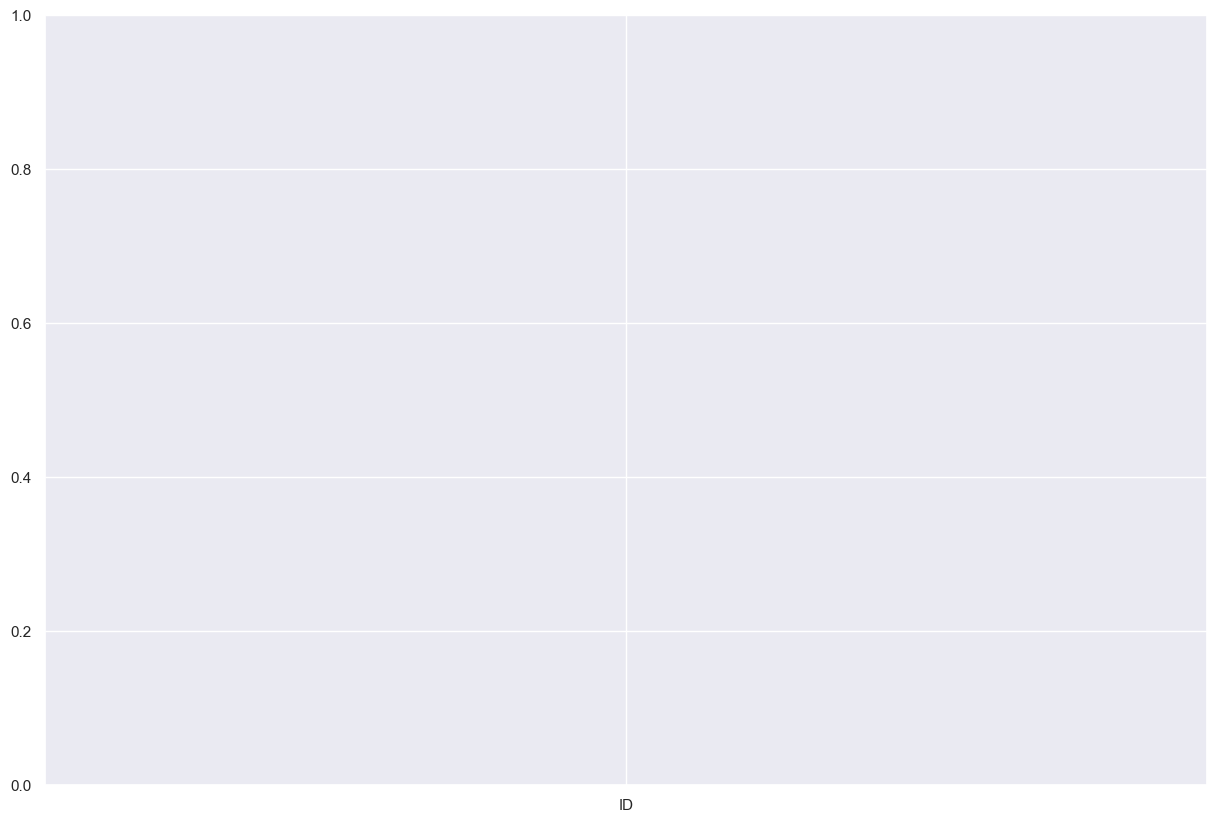

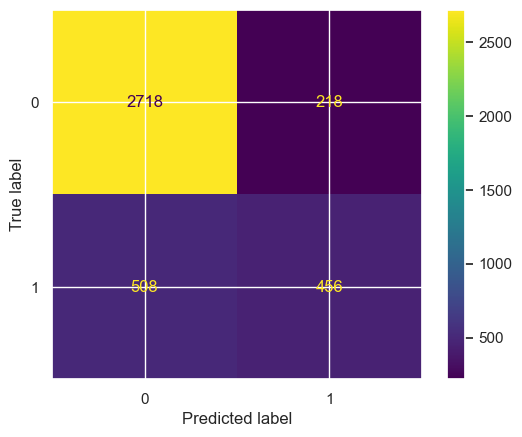

In [190]:
rezultat_knn = optimizacija(
    model=KNeighborsClassifier(), 
    hiperparametri={ "n_neighbors" : [1,4,5,9] , "weights" : ["uniform", "distance"], "leaf_size" : [15,20,35]},
    metrike="accuracy",
    training_input=X_reduced_training_set,
    training_output=Y_train,
    test_input=X_reduced_testing_set,
    test_output=Y_test
)
rezultat_evaluacije = evaluacija(rezultat_knn)

pprint.pprint(rezultat_evaluacije)

suma_sumarum_reduced.append(rezultat_evaluacije)

**Stochastic Gradient Descent**

Analirizam  SGDClassifier  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'alpha': 0.01, 'eta0': 0.1, 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l1'}
Scorer used was:  recall_score  and the test score was:  [0.76917349 0.78020205 0.81104132 0.81200323 0.81104138 0.81200323
 0.81161843 0.81200323 0.76109233 0.7843047  0.76250395 0.7759044
 0.76474756 0.77410896 0.76590177 0.77410896 0.74422623 0.75923379
 0.81104132 0.81200323 0.81046428 0.81200323 0.81168255 0.81200323
 0.73980445 0.75916843 0.76250395 0.7759044  0.76186278 0.77436545
 0.7659659  0.77417308 0.70197768 0.77763712 0.81104132 0.81200323
 0.80905357 0.81123375 0.81168255 0.81200323 0.7364058  0.75916967
 0.76250395 0.7759044  0.76224745 0.77314711 0.76590177 0.77417308
 0.75096051 0.77763712 0.81104132 0.81200323 0.80334899 0.81097726
 0.81161843 0.81200323 0.69229602 0.76910875 0.76250395 0.7759044
 0.76070

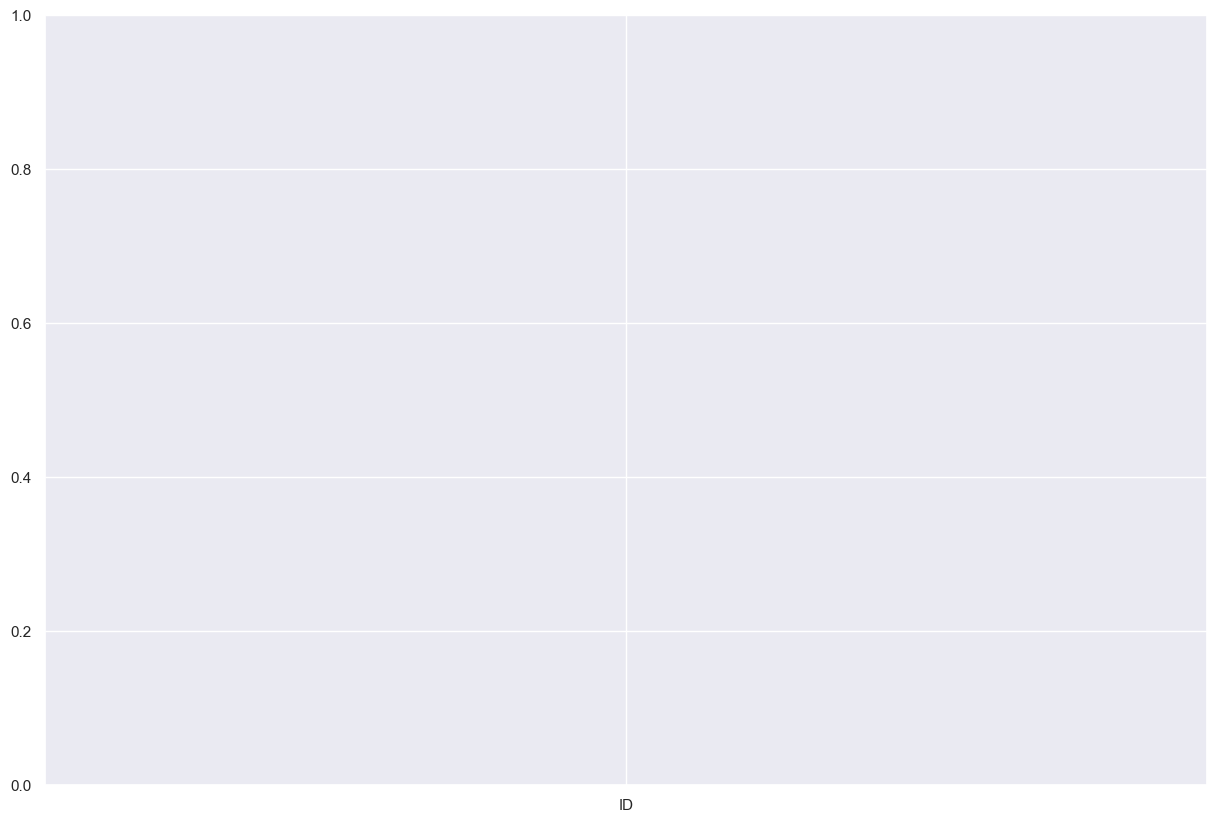

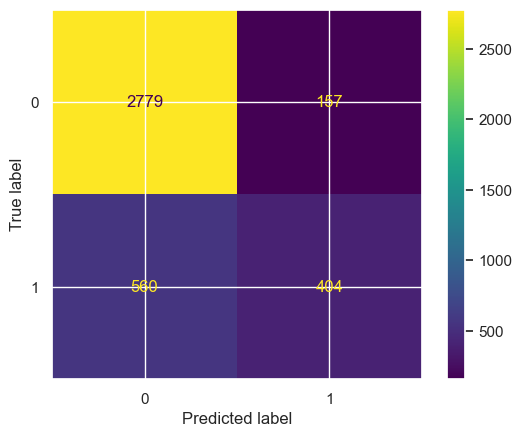

In [191]:
rezultat_SGDC = optimizacija(
    model=SGDClassifier(max_iter=1000, random_state=42), 
    hiperparametri={ 
          "alpha": [0.01, 0.5, 1, 3, 5], 
          "penalty": ["l2", "l1"], "loss": ["log_loss"],
          "fit_intercept" : [True, False],
          "learning_rate" : ["constant", "optimal", "invscaling", "adaptive"],
          "eta0" : [ 0.1, 0.5, 1, 2]
    },
    metrike="accuracy",
    training_input=X_reduced_training_set,
    training_output=Y_train,
    test_input=X_reduced_testing_set,
    test_output=Y_test
)
rezultat_evaluacije = evaluacija(rezultat_SGDC)

pprint.pprint(rezultat_evaluacije)

suma_sumarum_reduced.append(rezultat_evaluacije)

**Bernoulli Naive Bayes**

Analirizam  BernoulliNB  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'alpha': 500, 'fit_prior': True}
Scorer used was:  recall_score  and the test score was:  [0.78712484 0.77878955 0.78712484 0.77878955 0.78712484 0.77878955
 0.78706072 0.77878955 0.78706072 0.77878955 0.78891992 0.77878955]
Doslo je do greske	 shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (24,) and arg 1 with shape (6,).
-------------------------------------------------------------------------------------

{'accuracy_score': 0.7912820512820513,
 'model': 'BernoulliNB',
 'precision_score': 0.5897129186602871,
 'recall_score': 0.5114107883817427,
 'roc_auc_score': 0.7661424355828914}


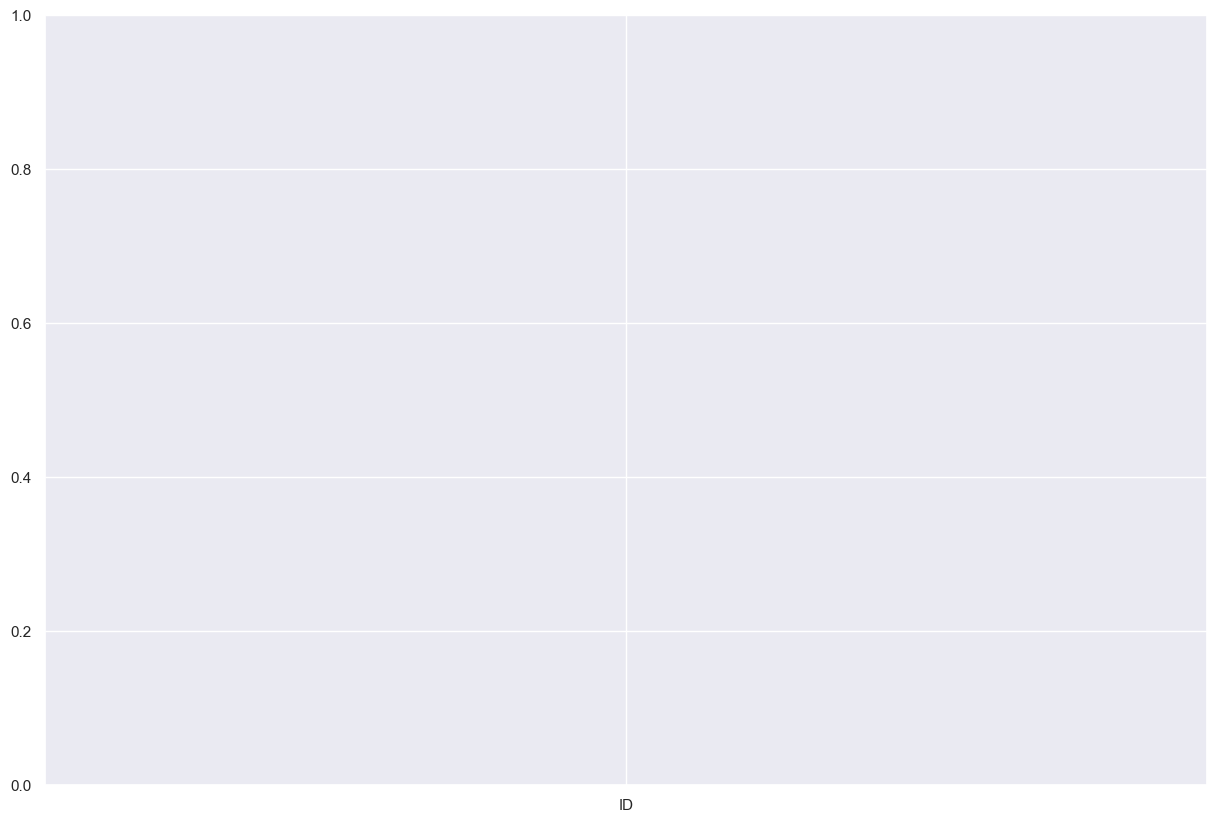

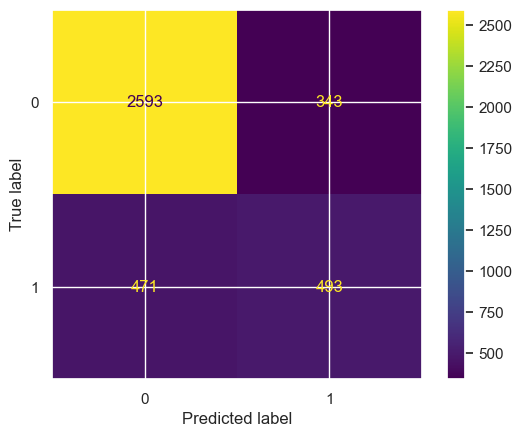

In [192]:
rezultat_NaiveBayes = optimizacija(
    model=BernoulliNB(), 
    hiperparametri={ "alpha": [10, 15, 30, 50, 100, 500], "fit_prior": [True,False]  },
    metrike="accuracy",
    training_input=X_reduced_training_set,
    training_output=Y_train,
    test_input=X_reduced_testing_set,
    test_output=Y_test
)

rezultat_evaluacije = evaluacija(rezultat_NaiveBayes)

pprint.pprint(rezultat_evaluacije)

suma_sumarum_reduced.append(rezultat_evaluacije)

**Logistic Regression**

Analirizam  LogisticRegression  model
-------------------------------------------------------------------------------------
Najbolje vrednosti parametra:  {'C': 0.05, 'penalty': 'l1'}
Scorer used was:  recall_score  and the test score was:  [0.74923058 0.79808903 0.75897664 0.80039738 0.81161849 0.81149025
 0.81161849 0.81149025 0.81149025 0.81149025 0.81149025 0.81149025
 0.81149025 0.81149025]
-------------------------------------------------------------------------------------

{'accuracy_score': 0.8161538461538461,
 'model': 'LogisticRegression',
 'precision_score': 0.7201426024955436,
 'recall_score': 0.4190871369294606,
 'roc_auc_score': 0.772201148710527}


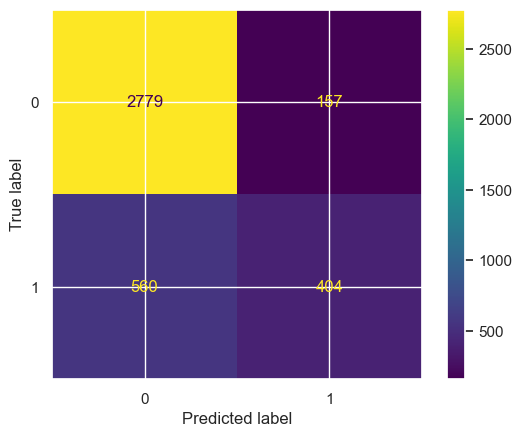

In [197]:
rezultat_logReg = optimizacija(
    model=LogisticRegression(solver="liblinear", max_iter=200), 
    hiperparametri={ "penalty": ["l1", "l2"], "C": [0.0003, 0.001, 0.05, 0.1, 1, 2, 5]},
    metrike="accuracy",
    training_input=X_reduced_training_set,
    training_output=Y_train,
    test_input=X_reduced_testing_set,
    test_output=Y_test
)

rezultat_evaluacije = evaluacija(rezultat_logReg)

pprint.pprint(rezultat_evaluacije)

suma_sumarum_reduced.append(rezultat_evaluacije)

**Analiza redukovanih rezultata**

In [194]:
for rezultat in pronadji_optimalne_metrike(suma_sumarum_reduced):
  print("Model sa najboljim ",rezultat["metrika"],"(",rezultat["score"],") je: ",rezultat["model"])

Model sa najboljim  accuracy ( 0.8161538461538461 ) je:  SGDClassifier
Model sa najboljim  precision ( 0.7201426024955436 ) je:  SGDClassifier
Model sa najboljim  recall ( 0.5114107883817427 ) je:  BernoulliNB
Model sa najboljim  roc_auc ( 0.7721645802005721 ) je:  LogisticRegression


In [195]:
pprint.pprint(suma_sumarum_reduced)

[{'accuracy_score': 0.8138461538461539,
  'model': 'KNeighborsClassifier',
  'precision_score': 0.6765578635014837,
  'recall_score': 0.4730290456431535,
  'roc_auc_score': 0.7701024342261467},
 {'accuracy_score': 0.8161538461538461,
  'model': 'SGDClassifier',
  'precision_score': 0.7201426024955436,
  'recall_score': 0.4190871369294606,
  'roc_auc_score': 0.7589866671566022},
 {'accuracy_score': 0.7912820512820513,
  'model': 'BernoulliNB',
  'precision_score': 0.5897129186602871,
  'recall_score': 0.5114107883817427,
  'roc_auc_score': 0.7661424355828914},
 {'accuracy_score': 0.8161538461538461,
  'model': 'LogisticRegression',
  'precision_score': 0.7201426024955436,
  'recall_score': 0.4190871369294606,
  'roc_auc_score': 0.7721645802005721}]
